In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphs potting 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, classification_report
from statsmodels.api import OLS

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataframe = pd.read_csv("/content/drive/My Drive/ML_Course/Placement_Data_Full_Class.csv", index_col="sl_no")
dataframe.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
#Make copies of dataframe
data_reg = dataframe.copy()
data_class = dataframe.copy()

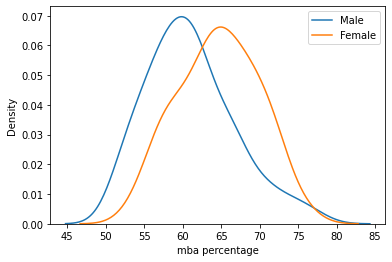

In [4]:
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="M"])
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("mba percentage")
plt.show()

**This vizualization shows that Male average score is near to 60, while that of Female is near to 65.**

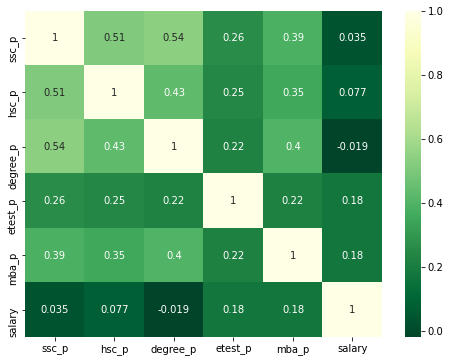

In [5]:
matrix = dataframe.corr()
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(matrix,annot=True,cmap="YlGn_r")

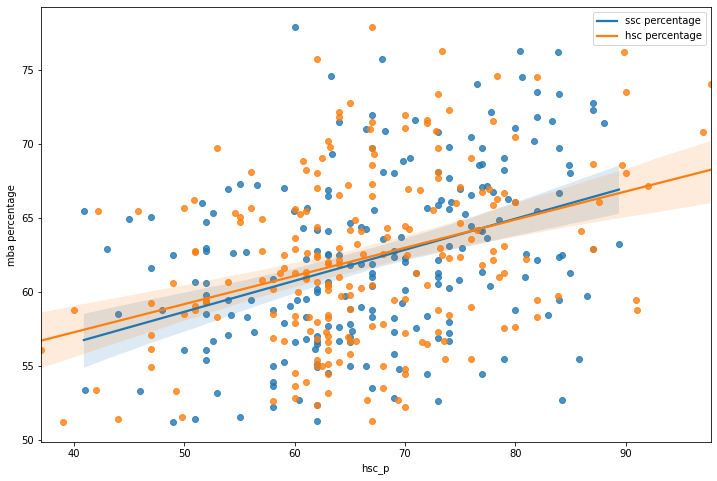

In [6]:
plt.figure(figsize=(12,8))
sns.regplot(x="ssc_p",y="mba_p",data=dataframe)
sns.regplot(x="hsc_p",y="mba_p",data=dataframe)
plt.legend(["ssc percentage", "hsc percentage"])
plt.ylabel("mba percentage")
plt.show()

**Multiple linear regression equation with mbap as response variable and sscp & hscp as the two predictor variables**

In [7]:
# Seperating independent and dependent variables
#dependent variables ssc_p, hsc_p
X = data_class.iloc[:,[1,3]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

In [8]:
#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [9]:
#import library
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#train the model
regressor.fit(X_train, y_train)

#predict the test set(mba_p)
y_pred_m = regressor.predict(X_test)

In [10]:
#from sklearn.metrics import r2_score, classification_report
print("R2 score: " + str(r2_score(y_test, y_pred_m)))

R2 score: 0.1749591688855493


In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.13869167 0.13315395]]
[44.04616422]


In [12]:
#from statsmodels.api import OLS
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              5048.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                   4.18e-152
Time:                        03:58:37   Log-Likelihood:                         -602.68
No. Observations:                 172   AIC:                                      1209.
Df Residuals:                     170   BIC:                                      1216.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5122      0.056      9.099      0.000       0.401       0.623
x2             0.4051      0.057      7.132      0.000       0.293       0.517
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.101
Skew:                           0.193   Prob(JB):                        0.577
Kurtosis:                       3.066   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**mbap as outcome variable and sscp & degreep as the two predictor variables**

In [13]:
# Seperating independent and dependent variables
#dependent variables ssc_p, degree_p
X = data_class.iloc[:,[1,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the dependent variable
y_pred_m = regressor.predict(X_test)

#from sklearn.metrics import r2_score, classification_report
print("R2 score: " + str(r2_score(y_test, y_pred_m)))
print("regression coeff: " + str(regressor.coef_))
print("regression intercept: " + str(regressor.intercept_))
print("mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66")

R2 score: 0.2670526417462228
regression coeff: [[0.1237819  0.21517005]]
regression intercept: [39.65800695]
mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66


**Use mbap as outcome variable and hscp & degreep as the two predictor variables.**

In [14]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)

#from sklearn.metrics import r2_score, classification_report
print("R2 score:" + str(r2_score(y_test, y_pred_m)))
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.17616396722600414
regression coeff:[[0.13171318 0.22510365]]
regression intercept:[38.56332438]
mba_p = 0.13171318061863166 x hsc_p + 0.22510364524995355 x degree_p + 38.56332437694495


**Model with mba_p as dependent varialble and ssc_p, hsc_p and degree_p as three independent variables.**

In [15]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[1,3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Summary of the model
#from statsmodels.api import OLS
summ=OLS(y_train,X_train).fit()
summ.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4980.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                   1.34e-164
Time:                        04:14:57   Log-Likelihood:                         -569.34
No. Observations:                 172   AIC:                                      1145.
Df Residuals:                     169   BIC:                                      1154.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1817      0.063      2.892      0.004       0.058       0.306
x2             0.1940      0.054      3.583      0.000       0.087       0.301
x3             0.5572      0.066      8.455      0.000       0.427       0.687
==============================================================================
Omnibus:                        3.046   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                3.043
Skew:                           0.284   Prob(JB):                        0.218
Kurtosis:                       2.681   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Drop the ssc feature**

In [17]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#predict the values
y_pred_m = regressor.predict(X_test)

In [19]:
#Summary of the model
#from statsmodels.api import OLS
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              7155.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                   8.33e-165
Time:                        04:15:42   Log-Likelihood:                         -573.50
No. Observations:                 172   AIC:                                      1151.
Df Residuals:                     170   BIC:                                      1157.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2537      0.051      4.963      0.000       0.153       0.355
x2             0.6804      0.051     13.245      0.000       0.579       0.782
==============================================================================
Omnibus:                        4.630   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.431
Skew:                           0.212   Prob(JB):                        0.180
Kurtosis:                       2.453   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#from sklearn.metrics import r2_score, classification_report
#R2 score
print("R2 score:" + str(r2_score(y_test, y_pred_m)))

#model p values
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.1883460640212925
regression coeff:[[0.14059098 0.2137894 ]]
regression intercept:[38.89461384]
mba_p = 0.14059098107062354 x hsc_p + 0.21378939519548953 x degree_p + 38.89461383778403


In [21]:
np.set_printoptions(precision=2)
dff = pd.DataFrame(list(zip(y_test, y_pred_m.round(2))),columns=("Target","Predicted"))
dff.head(8)

,Target,Predicted
0,[62.54],[62.23]
1,[70.81],[69.42]
2,[72.14],[61.62]
3,[69.7],[66.47]
4,[65.48],[57.92]
5,[61.31],[62.01]
6,[52.64],[59.02]
7,[57.65],[64.04]


With mbap as response variable and sscp & hscp as the two predictor variables, p-values of hsc and ssc predictor variable is 0 hence, both of them are statistically significant variables.

Using mbap as outcome variable and sscp & degreep as the two predictor variables, R2(**goodness-of-fit measure**) score that we get is 0.267, while using mbap as outcome variable and hscp & degreep as the two predictor variables, R2 score we get is 0.176. R-squared is the strength of the relationship between the model and the dependent variable. Hence, model with mbap as outcome variable and sscp & degreep as the two predictor variables is better.

Model with mba_p as dependent varialble and ssc_p, hsc_p and degree_p as three independent variables, P values of hsc and degree predictor variable is 0 hence, both of them are statistically significant variables. But p value of ssc is not 0. Dropping ssc gives R2 score = 0.188.

